In [1]:
import pandas as pd
A = pd.read_csv("C:/Users/Gayatri/Downloads/AirPassengers.csv")

In [2]:
A.head(2)

,Month,#Passengers
0,1949-01,112
1,1949-02,118


In [3]:
A.Date = pd.to_datetime(A.Month,format="%Y-%m")

<ipython-input-3-45fc302b8a4c>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  A.Date = pd.to_datetime(A.Month,format="%Y-%m")


In [4]:
A.head(2)

,Month,#Passengers
0,1949-01,112
1,1949-02,118


In [5]:
A.index=A.Date

In [6]:
A.head(2)

,Month,#Passengers
Month,,
1949-01-01,1949-01,112
1949-02-01,1949-02,118


In [7]:
A = A.drop(labels=["Month"],axis=1)

In [8]:
A.head(2)

,#Passengers
Month,
1949-01-01,112
1949-02-01,118


<AxesSubplot:xlabel='Month'>

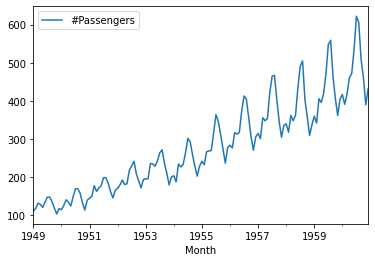

In [9]:
A.plot()

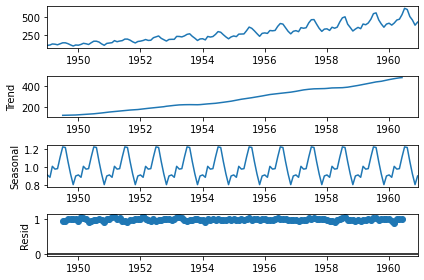

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose

import matplotlib.pyplot as plt
fig = seasonal_decompose(A,model="multiplicative")
fig.plot()
plt.show()

In [11]:
A

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [13]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit_transform(A[['#Passengers']])

array([[-1.40777884],
       [-1.35759023],
       [-1.24048348],
       [-1.26557778],
       [-1.33249593],
       [-1.21538918],
       [-1.10664719],
       [-1.10664719],
       [-1.20702441],
       [-1.34922546],
       [-1.47469699],
       [-1.35759023],
       [-1.38268454],
       [-1.29067209],
       [-1.16520057],
       [-1.21538918],
       [-1.29903686],
       [-1.09828242],
       [-0.9226223 ],
       [-0.9226223 ],
       [-1.02299951],
       [-1.23211871],
       [-1.3910493 ],
       [-1.17356534],
       [-1.1317415 ],
       [-1.08991766],
       [-0.85570415],
       [-0.98117567],
       [-0.90589276],
       [-0.85570415],
       [-0.68004402],
       [-0.68004402],
       [-0.80551554],
       [-0.98954044],
       [-1.12337673],
       [-0.95608137],
       [-0.91425753],
       [-0.83897462],
       [-0.73023263],
       [-0.83060985],
       [-0.81388031],
       [-0.52111343],
       [-0.42073621],
       [-0.320359  ],
       [-0.59639634],
       [-0

In [14]:
A[["#Passengers"]].mean()

#Passengers    280.298611
dtype: float64

In [15]:
import numpy as np
log_pass = np.log(A[["#Passengers"]])
rm = log_pass.rolling(window=12).mean()
A['diff']=log_pass-rm


In [17]:
B=  A[A['diff'].isnull()==False]


In [18]:
B=B.drop(labels=["#Passengers"],axis=1)

In [19]:
B.columns=["Pass"]

In [20]:
B.head(2)

,Pass
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449


In [21]:
from statsmodels.tsa.stattools import adfuller
x = adfuller(pd.Series(B['Pass']))
if(x[1]<0.05):
    print("Stationary")
else:
    print("Not Stationary")

Stationary


In [22]:
from statsmodels.tsa.stattools import adfuller
x = adfuller(pd.Series(A['#Passengers']))
if(x[1]<0.05):
    print("Stationary")
else:
    print("Not Stationary")

Not Stationary


In [26]:
trd = B[B.index.year<=1958]
tsd = B[B.index.year>1958]

from statsmodels.tsa.ar_model import AR
model = AR(trd).fit()
pred = model.predict(start="1959-01-01",end="1960-12-01")
tsd['Forecasted_from_AR']=pred

C:\Users\Gayatri\anaconda3\gayu\lib\site-packages\statsmodels\tsa\ar_model.py:791: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWarni

In [27]:
tsd

,Pass,Forecasted_from_AR
Month,,
1959-01-01,-0.049241,-0.063446
1959-02-01,-0.106598,-0.142865
1959-03-01,0.055385,-0.054353
1959-04-01,0.019679,-0.080923
1959-05-01,0.066365,0.000782
1959-06-01,0.176286,0.147897
1959-07-01,0.316430,0.266176
1959-08-01,0.327838,0.276603
1959-09-01,0.128057,0.111256
